In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
from lightjob.cli import load_db
from lightjob.db import SUCCESS
import numpy as np
import pandas as pd

In [4]:
db = load_db()

In [6]:
jobs = list(db.jobs_with(state=SUCCESS, where='jobset1'))

In [24]:
learning_rate = [j['content']['hp']['learning_rate'] for j in jobs]
max_train_acc = [max(h['train_acc'] for h in j['history']) for j in jobs]
max_valid_acc = [max(h['valid_acc'] for h in j['history']) for j in jobs]
max_test_acc = [max(h['valid_acc'] for h in j['history']) for j in jobs]
test_max_valid_acc = [ j['history'][np.argmax(h['valid_acc'] for h in j['history'])]['test_acc'] for j in jobs]

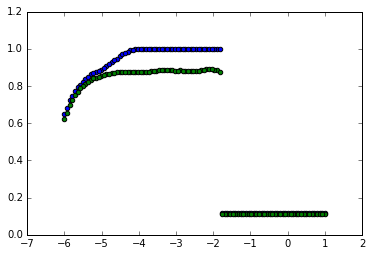

In [45]:
plt.scatter(np.log10(learning_rate), max_train_acc, c='b', marker='o')
plt.scatter(np.log10(learning_rate), max_valid_acc, c='g', marker='o')
#plt.scatter(np.log10(learning_rate), test_max_valid_acc, c='r')
plt.legend()

In [53]:
d = [[h['train_acc'], h['valid_acc'], j['content']['hp']['learning_rate']] for j in jobs for h in j['history']]
d = np.array(d)

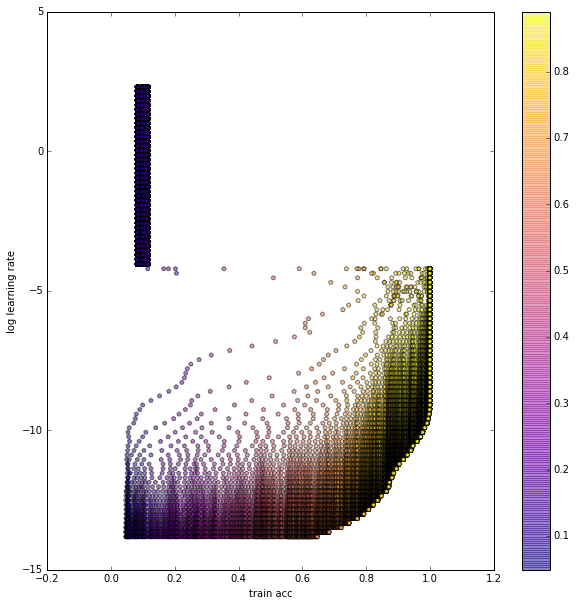

In [66]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(d[:, 0], np.log(d[:, 2]), c=d[:, 1], marker='p', cmap='plasma', alpha=0.5)
plt.xlabel('train acc')
plt.ylabel('log learning rate')
cm = plt.colorbar()
plt.legend()

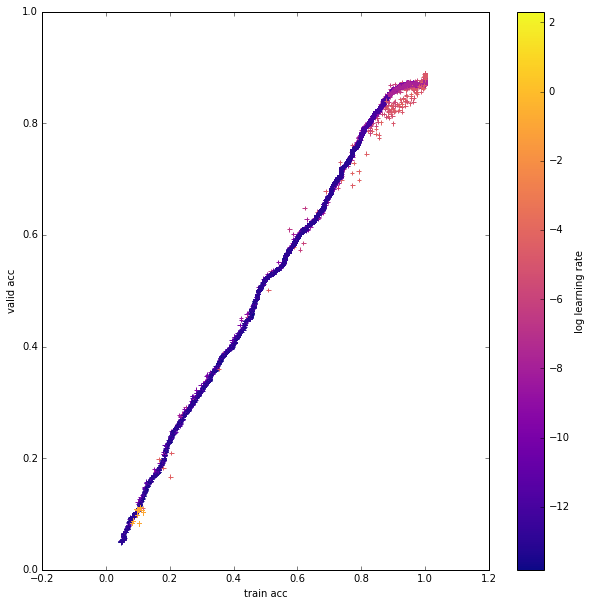

In [110]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(d[:, 0], (d[:, 1]), c=np.log(d[:, 2]), marker='+', cmap='plasma')
plt.xlabel('train acc')
plt.ylabel('valid acc')
cm = plt.colorbar(label='log learning rate')
plt.legend()

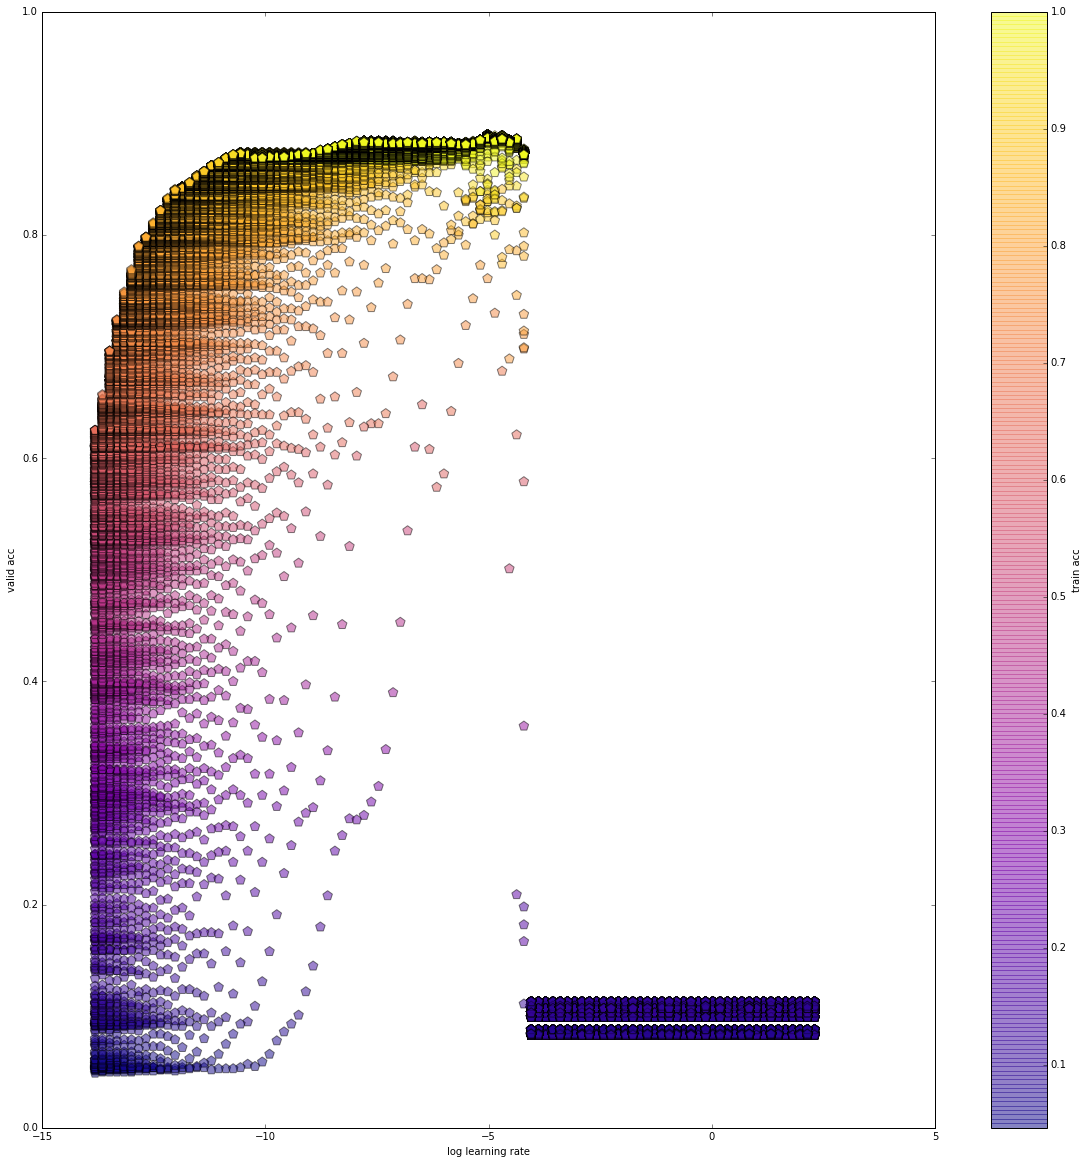

In [115]:
fig = plt.figure(figsize=(20, 20))
plt.scatter(np.log(d[:, 2]), (d[:, 1]), c=d[:, 0], marker='p', s=100, cmap='plasma', alpha=0.5)
plt.xlabel('log learning rate')
plt.ylabel('valid acc')
cm = plt.colorbar(label='train acc')
plt.legend()

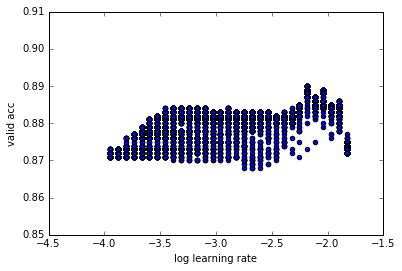

In [113]:
#o = (d[:, 0] >= 0.9) & (d[:, 0] <= 1) 
o = d[:, 0]==1
plt.scatter(np.log10(d[o, 2]), d[o, 1])
plt.xlabel('log learning rate')
plt.ylabel('valid acc')

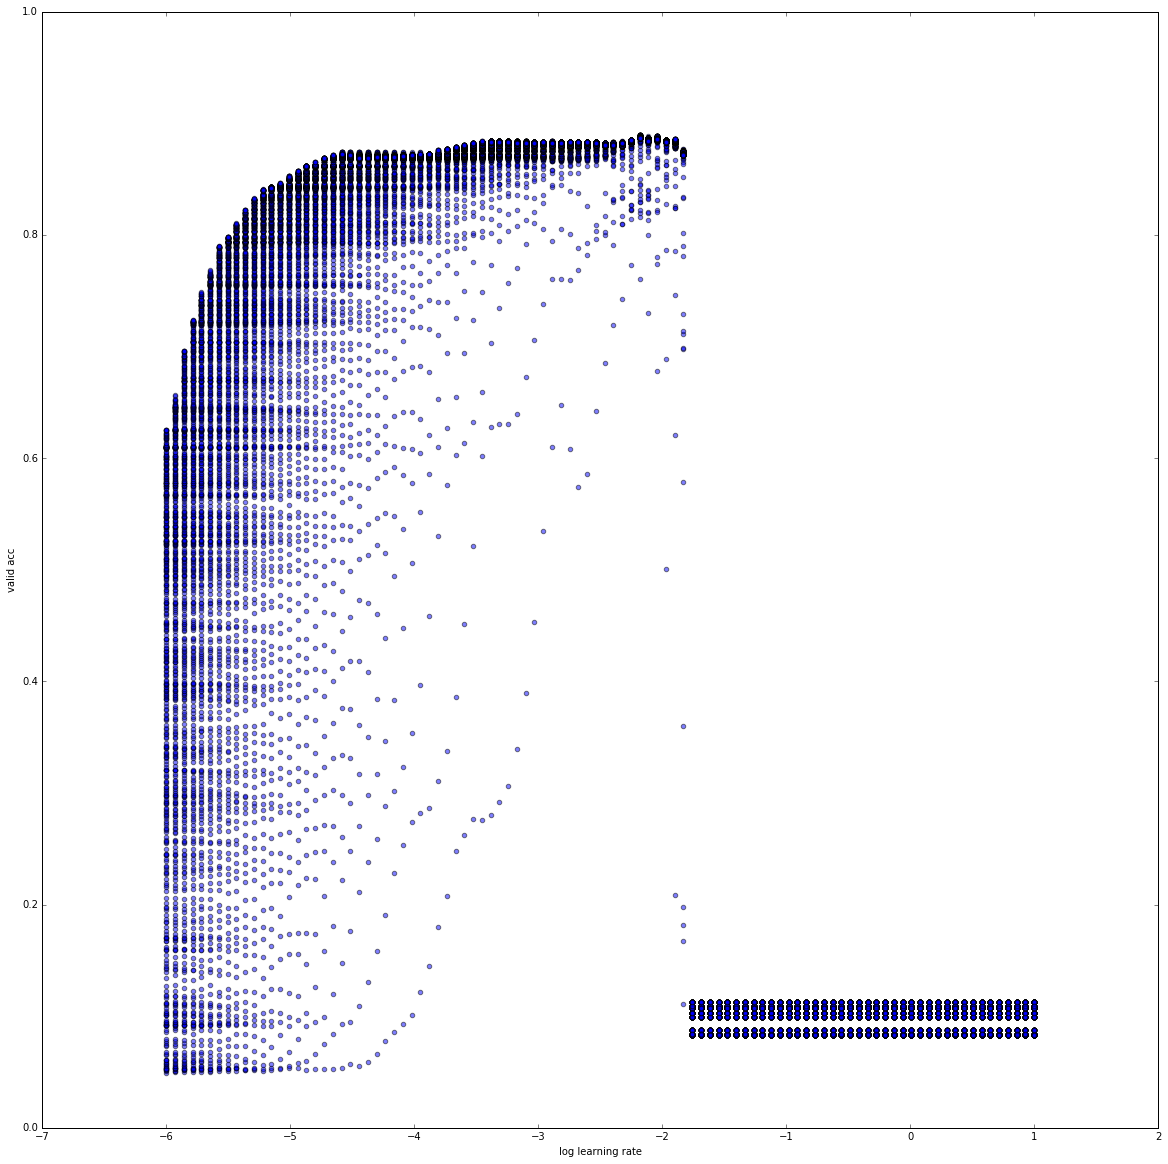

In [121]:
fig = plt.figure(figsize=(20, 20))
#o = (d[:, 0] >= 0.9) & (d[:, 0] <= 1) 
plt.scatter(np.log10(d[:, 2]), d[:, 1], marker='o', alpha=0.5)
plt.xlabel('log learning rate')
plt.ylabel('valid acc')